In [162]:
import pandas as pd
import glob
import re
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
def graph_it(data_dir, graph_type):
    if(graph_type=='run_time'):
        keyword='experiment_stats'
    elif(graph_type=='tree_plot')

In [163]:
dfs = []

In [164]:
for f in glob.glob('more_lf_*'):
    print(f)
    df=pd.read_csv(f)
    dfs.append(df)
# df=pd.read_csv('lf_2023-04-20-05-20-47')

more_lf_2023-04-21-20-24-19
more_lf_2023-04-21-20-30-22
more_lf_2023-04-21-20-36-10
more_lf_2023-04-21-20-41-45
more_lf_2023-04-21-20-47-21


In [165]:
df = pd.concat(dfs)

In [184]:
df.to_csv('more_funcs_more_signals.csv', index=False)

In [166]:
df['user_input_cnt']=df['num_complaints']+df['confirmation_cnt']

In [167]:
l = ['strat',
 'runtime',
 'avg_tree_size_increase',
 'user_input_cnt',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt']

In [168]:
df[l].sort_values(['user_input_cnt','strat'])

,strat,runtime,avg_tree_size_increase,user_input_cnt,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt
0,information gain,0.007,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
0,information gain,0.008,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
0,information gain,0.010,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
0,information gain,0.007,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
0,information gain,0.011,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
1,naive,0.009,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
1,naive,0.008,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
1,naive,0.006,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
1,naive,0.009,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948
1,naive,0.007,0.666667,2,1,1,0.474,1.0,1.0,0.691,1948,1948


In [169]:
list(df)

['strat',
 'runtime',
 'avg_tree_size_increase',
 'num_complaints',
 'confirmation_cnt',
 'global_accuracy',
 'fix_rate',
 'confirm_preserve_rate',
 'new_global_accuracy',
 'prev_signaled_cnt',
 'new_signaled_cnt',
 'user_input_cnt']

In [170]:
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='strat,user_input_cnt'>

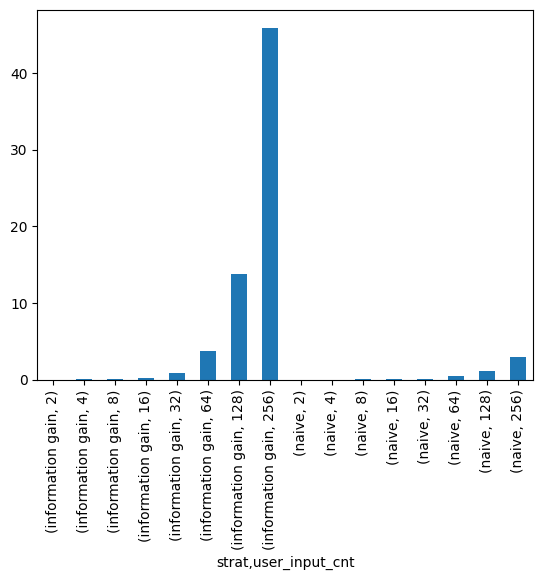

In [171]:
grouped = df.groupby(['strat','user_input_cnt']).mean()
# print(grouped)
grouped['runtime'].plot(kind='bar')

<AxesSubplot: xlabel='strat,user_input_cnt'>

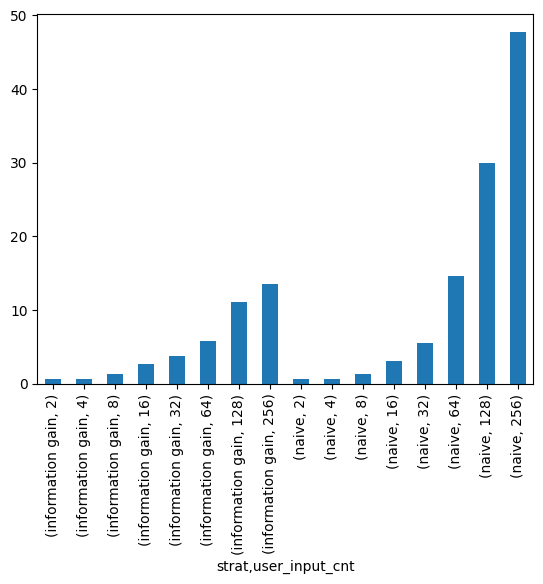

In [172]:
grouped['avg_tree_size_increase'].plot(kind='bar')

<AxesSubplot: xlabel='strat,user_input_cnt'>

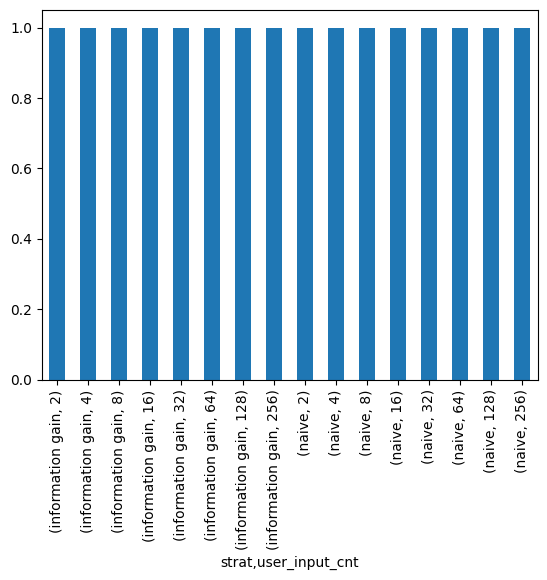

In [173]:
grouped['fix_rate'].plot(kind='bar')

[0.474]
[0.691]
[0.474]
[0.691]
[0.474]
[0.686]
[0.474]
[0.697]
[0.474]
[0.748]
[0.474]
[0.755]
[0.474]
[0.774]
[0.474]
[0.801]
[0.474]
[0.691]
[0.474]
[0.691]
[0.474]
[0.686]
[0.474]
[0.697]
[0.474]
[0.714]
[0.474]
[0.598]
[0.474]
[0.616]
[0.474]
[0.75]


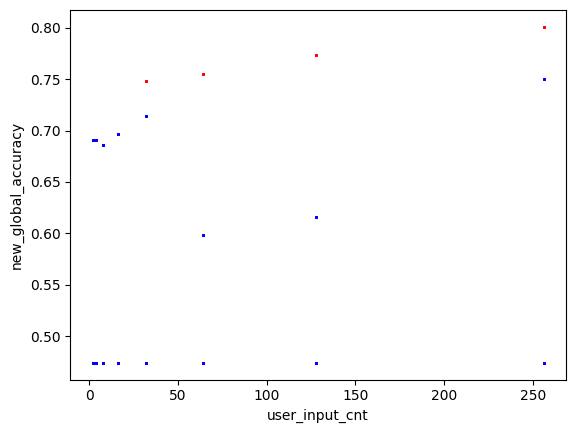

In [174]:
grouped = df.groupby(['strat','user_input_cnt'])
colors={'information gain': 'red', 'naive': 'blue'}
fig, ax = plt.subplots()

for name, group in grouped:
    print(group['global_accuracy'].unique())
    print(group['new_global_accuracy'].unique())
    group.plot(x='user_input_cnt', y='global_accuracy', kind='scatter', ax=ax, color=colors[name[0]], s=1)
    group.plot(x='user_input_cnt', y='new_global_accuracy', kind='scatter', ax=ax, color=colors[name[0]], s=1)
plt.show()

In [175]:
# df_initial[df_initial['model_pred']==-1]['vectors'].unique()

In [176]:
# df_initial[df_initial['model_pred']==1]['vectors'].unique()

In [177]:
# spam_l = list(df_initial[df_initial['model_pred']==0]['vectors'].unique())

In [178]:
# spam_l

In [179]:
# spam_l_proc = [x.replace('-1',' ') for x in spam_l]

In [180]:
# spam_l_proc

In [181]:
# df_initial[df_initial['model_pred']==0].groupby('vectors').size()

In [182]:
# len(df_initial[df_initial['expected_label']==df_initial['model_pred']])

In [183]:
# len(df_initial)